# Problem Statement:

The task is to train a machine learning model to determine whether a person makes over $50K a year or not. The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. This data was extracted from the 1994 Census bureau database.

# Importing Dataset

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Dataset
df=pd.read_csv('census_income.csv')
#Visualizing dataset
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


There are 32560 rows and 15 columns in our dataset. 

# Checking Null Values

In [3]:
#Checking Null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

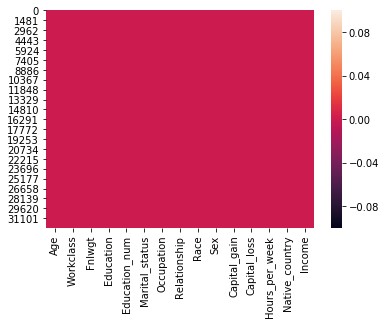

In [80]:
#Visualizing null values through heatmap
import seaborn as sns
sns.heatmap(df.isnull())

We cannot find any null values in the dataset. Hence, we can proceed towards visualizing our data.

# Making DataFrame for the Nominal Data

In [5]:
#Copying nominal variables into a new dataframe
df_nominal=df[['Workclass', 'Education', 'Education_num','Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex','Native_country','Income']].copy()

In [6]:
#Checking columns of new nominal dataframe created
df_nominal.columns

Index(['Workclass', 'Education', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country',
       'Income'],
      dtype='object')

In [7]:
df_nominal.shape

(32560, 10)

There are 10 columns in the newly created nominal DataFrame which consists of only categorial Data. We will now start visualizing this data.

# Visualization Of Data

For the nominal categorical data we will use countplot as it will gives frequency of the columns.

In [8]:
#Importing Libraries for Visualization
import seaborn as sns
import matplotlib.pyplot as plt

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


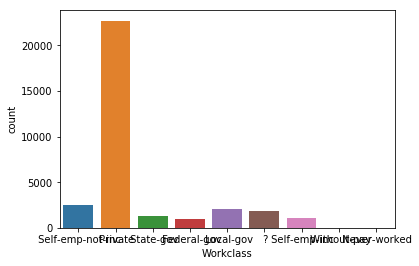

In [9]:
#Using countplot for nominal data
ab=sns.countplot(x='Workclass', data=df_nominal)
print(df_nominal['Workclass'].value_counts())

The maximum working class if from the private sector, Self-emp-not-inc and Local-gov i.e 22696, 2541 & 2093 people respectively from each sector. Least number of people are working without pay and have never worked which is 14 & 7 people respectively.
Also we have unknown values of 1836 people.

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


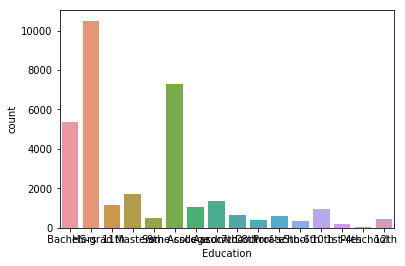

In [10]:
#Using countplot for nominal data
ab=sns.countplot(x='Education', data=df_nominal)
print(df_nominal['Education'].value_counts())

The Education of Maximum people is Hs-grad, Some-College & Bachelors which consists of 10501,7291 & 5354 people respectively. Least number of people are from 5th-6th,1st-4th & Prescool with 333,168 & 51 people respectively.

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64


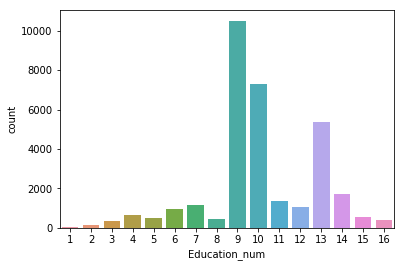

In [11]:
ab=sns.countplot(x='Education_num', data=df_nominal)
print(df_nominal['Education_num'].value_counts())

The maximum number of people are from Eduaction_num 9,10 & 13 and least are from 1,2,&3.

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


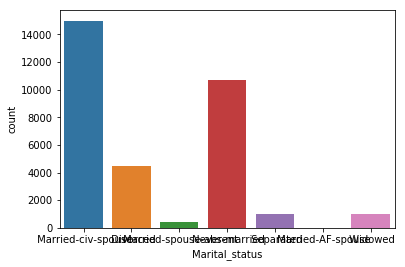

In [12]:
ab=sns.countplot(x='Marital_status', data=df_nominal)
print(df_nominal['Marital_status'].value_counts())

Most people are Married-civ-spouse(14976) & Never-married(10682). Least are from  Married-AF-spouse(24).

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


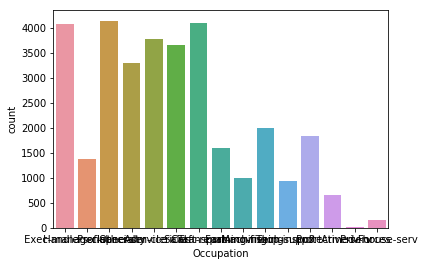

In [13]:
ab=sns.countplot(x='Occupation', data=df_nominal)
print(df_nominal['Occupation'].value_counts())

The Occupation of maximum people is Prof-speciality, Craft-repair & Exec-managerial. Hardly few are from Armed-Forces(9).

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


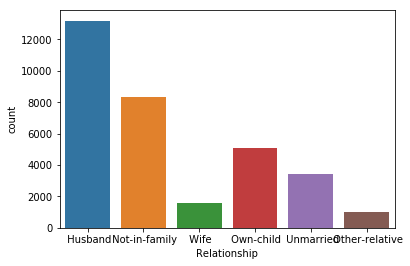

In [14]:
ab=sns.countplot(x='Relationship', data=df_nominal)
print(df_nominal['Relationship'].value_counts())

The Relationship people share are most of them Husband, Not-in-Family and very few are Other-relatives.

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


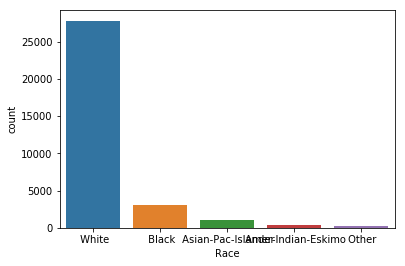

In [15]:
ab=sns.countplot(x='Race', data=df_nominal)
print(df_nominal['Race'].value_counts())

Out of the whole dataset, 27815 people are White which is maximum, 3124 are Black and very few are Other(271).

 Male      21789
 Female    10771
Name: Sex, dtype: int64


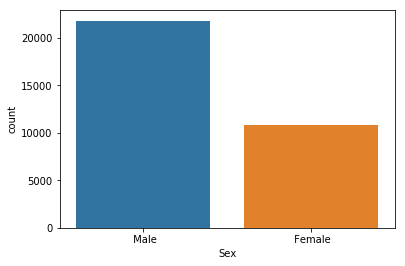

In [16]:
ab=sns.countplot(x='Sex', data=df_nominal)
print(df_nominal['Sex'].value_counts())

From the whole dataset, 21789 are Male and 10771 are Female.

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

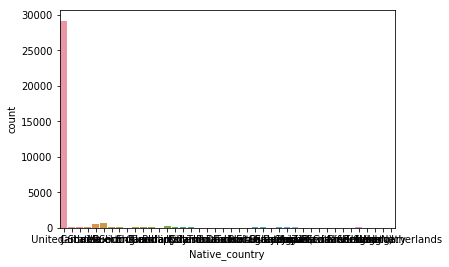

In [17]:
ab=sns.countplot(x='Native_country', data=df_nominal)
print(df_nominal['Native_country'].value_counts())

The maximum number of people have their Native country as USA(29169) and only 1 is from Holand-Netherlands. The Native country of 583 people is unknown.

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


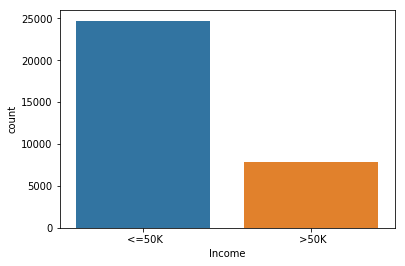

In [18]:
ab=sns.countplot(x='Income', data=df_nominal)
print(df_nominal['Income'].value_counts())

24719 people from our dataset have income more than 50k and 7841 people have income less than 50k. Maximum number of people have income more than 50k.

# Making DataFrame for Continuous Type Of Data 

In [19]:
#Copying our continuous data into a new dataframe
df_continuous=df[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']].copy()

In [20]:
#Checking columns of our new DataFrame
df_continuous.columns

Index(['Age', 'Fnlwgt', 'Capital_gain', 'Capital_loss', 'Hours_per_week'], dtype='object')

In [21]:
#Checking shape of continuous dataframe
df_continuous.shape

(32560, 5)

We have 5 columns in our continuous dataframe.

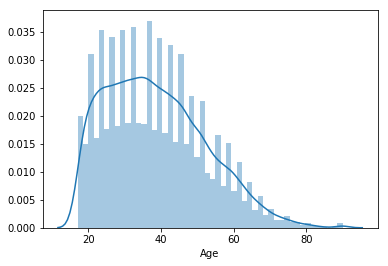

In [22]:
#Visualizing using distplot to check distribution of data
import seaborn as sns
sns.distplot(df['Age'],kde=True)

The Age of people in our dataset lies between 18 to 90 years of Age. Maximum people lie in the Age range between 18 & 50.

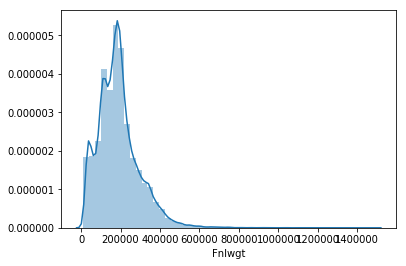

In [23]:
import seaborn as sns
sns.distplot(df['Fnlwgt'],kde=True)

The maximum values of Fnlwgt lie between 0 & 400000. We can observe that this data is right skewed.

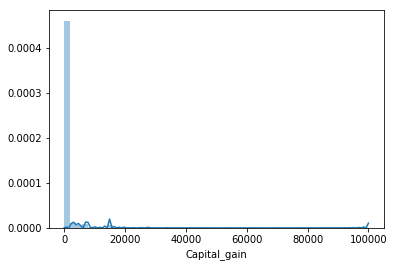

In [24]:
import seaborn as sns
sns.distplot(df['Capital_gain'],kde=True)

The Capital Gain of major data is 0. This data is also observed to be right skewed.

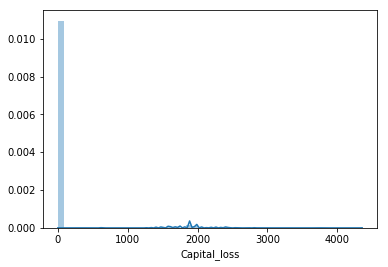

In [25]:
import seaborn as sns
sns.distplot(df['Capital_loss'],kde=True)

The Capital loss of major data is 0. This data is also observed to be right skewed.

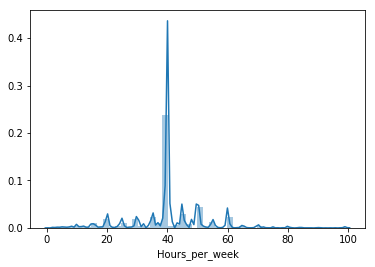

In [81]:
import seaborn as sns
sns.distplot(df['Hours_per_week'],kde=True)

Majority of the people work 50 hours per week.

# Visualization of Relationship between Nominal & Continuous Data

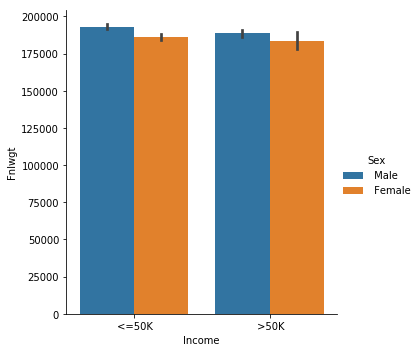

In [27]:
#set up a category plot
g=sns.catplot(x='Income',y='Fnlwgt',hue='Sex',data=df,kind='bar')
plt.show()

Income of a Male who earns less than or equal to 50k has a fnlwgt 190000 and that of a female is around 180000.

Income of a Male who earns more than 50k has a fnlwgt 185000 and that of a female is around 182000.

We cannot see much relationship between Fnlwgt & Sex with that of income


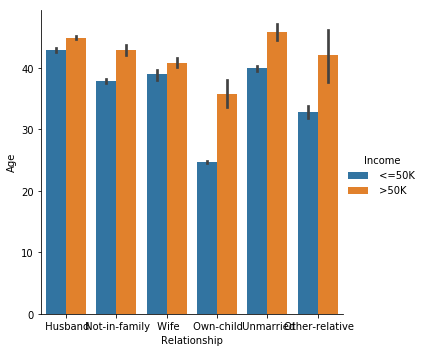

In [28]:
g=sns.catplot(x='Relationship',y='Age',hue='Income',data=df,kind='bar')
plt.show()

The Relationship & Age columns also do not show any relativity with the Income column.

# Encoding Of DataFrame

In [29]:
#Checking Datatypes
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

We can see many object data type columns in our dataset which we need to transform into float values to deal with the data. We will use Ordinal Encoder to Encode our Data.

In [30]:
#Importing library for encoding and creating instance for the same 
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [31]:
#Converting object datatype into float values
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [32]:
#Verifying Conversion 
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0.0


We can see that all our columns with string values are now converted into float values.

# Describe Data

In [33]:
#Describing final columns present in dataset
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [34]:
#Defining Shape
df.shape

(32560, 15)

We have 32560 rows and 15 columns in our dataset.

In [35]:
#Getting data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
Age               32560 non-null int64
Workclass         32560 non-null float64
Fnlwgt            32560 non-null int64
Education         32560 non-null float64
Education_num     32560 non-null int64
Marital_status    32560 non-null float64
Occupation        32560 non-null float64
Relationship      32560 non-null float64
Race              32560 non-null float64
Sex               32560 non-null float64
Capital_gain      32560 non-null int64
Capital_loss      32560 non-null int64
Hours_per_week    32560 non-null int64
Native_country    32560 non-null float64
Income            32560 non-null float64
dtypes: float64(9), int64(6)
memory usage: 3.7 MB


We now have no Null Values and all values in our dataset are in int and float values. Now, we can proceed forward with describing and understanding data.

In [36]:
#Describing mean, median, min, max values of data
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


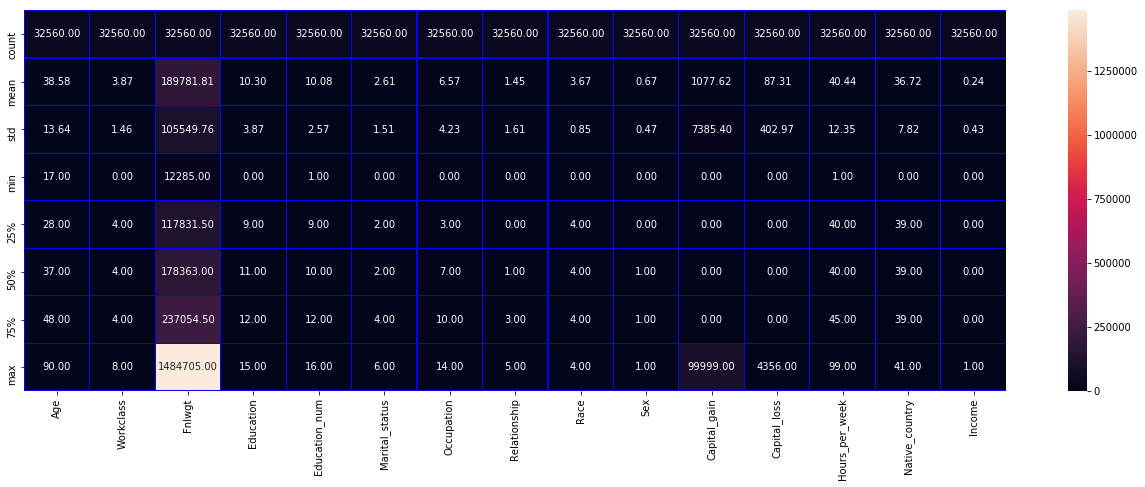

In [37]:
#Visualizing data description
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='blue',fmt='0.2f')

Observations:
    
We can see there are very high values in the fnlwgt column. 

The standard deviation in few columns is very high, hence the data might be skewed.

Observing the min and max values, we can also understand about the presence of huge outliers in our data.

The values of data are widely scattered from low range to high range within the data, hence scaling data is very important.



# Correlation Of Columns with the Target Variable

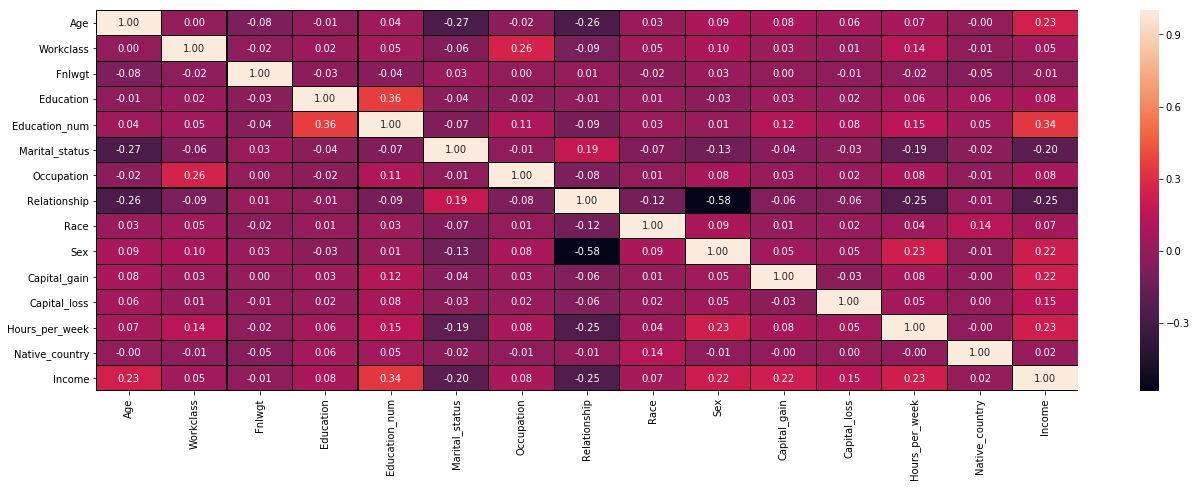

In [38]:
#Plotting correlation of input features with the target Variable
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

Observations:
    
The most positively correalted column with the target variale is education_num

The most negatively correalted column with the target variale is Relationship

Only three Columns are negatively Correlated with the Target Variable.


In [39]:
corr_matrix=df.corr()
corr_matrix['Income'].sort_values(ascending=False)

Income            1.000000
Education_num     0.335182
Age               0.234039
Hours_per_week    0.229690
Capital_gain      0.223333
Sex               0.215995
Capital_loss      0.150523
Education         0.079311
Occupation        0.075448
Race              0.071853
Workclass         0.051645
Native_country    0.015845
Fnlwgt           -0.009481
Marital_status   -0.199295
Relationship     -0.250924
Name: Income, dtype: float64

We have sorted the Correlation of our input variables with that of the Target Variable in Ascending Order.

# Checking Skewness

In [40]:
#Checking Skewness
df.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

We can observe that our Data is highly skewed. Hence,we will check outliers and reduce the Skewness.

# Checking Outliers

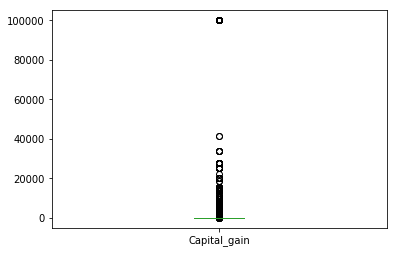

In [41]:
df['Capital_gain'].plot.box()

We can see too many outliers present in the capital gain column.

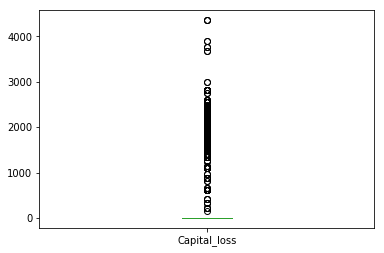

In [42]:
df['Capital_loss'].plot.box()

Too many outliers are present in the capital loss column. We will now visualize the outliers for all the columns.

Age                   AxesSubplot(0.125,0.71587;0.0824468x0.16413)
Workclass          AxesSubplot(0.223936,0.71587;0.0824468x0.16413)
Fnlwgt             AxesSubplot(0.322872,0.71587;0.0824468x0.16413)
Education          AxesSubplot(0.421809,0.71587;0.0824468x0.16413)
Education_num      AxesSubplot(0.520745,0.71587;0.0824468x0.16413)
Marital_status     AxesSubplot(0.619681,0.71587;0.0824468x0.16413)
Occupation         AxesSubplot(0.718617,0.71587;0.0824468x0.16413)
Relationship       AxesSubplot(0.817553,0.71587;0.0824468x0.16413)
Race                 AxesSubplot(0.125,0.518913;0.0824468x0.16413)
Sex               AxesSubplot(0.223936,0.518913;0.0824468x0.16413)
Capital_gain      AxesSubplot(0.322872,0.518913;0.0824468x0.16413)
Capital_loss      AxesSubplot(0.421809,0.518913;0.0824468x0.16413)
Hours_per_week    AxesSubplot(0.520745,0.518913;0.0824468x0.16413)
Native_country    AxesSubplot(0.619681,0.518913;0.0824468x0.16413)
Income            AxesSubplot(0.718617,0.518913;0.0824468x0.16

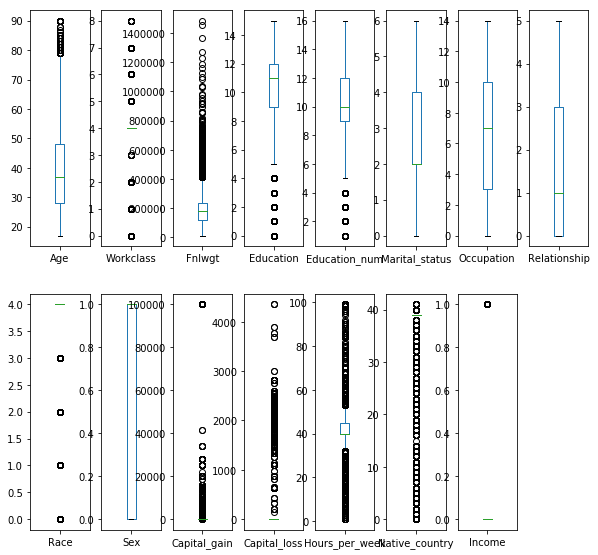

In [43]:
#Multivariate analysis to check outliers of all columns
df.plot(kind='box',subplots=True,layout=(4,8),figsize=(10,20))

We can observe that there are too many outliers present in the majority of our columns. We tried resolving these outliers but we loose 15.47% of data which is a huge data loss and we might miss out on very important information. Hence, we will not resolve these outliers and proceed forawrd.

# Separating the Column into x & y

In [44]:
#Creating x & y columns 
x=df.drop('Income',axis=1)
y=df['Income']

# Transforming Data to Reduce Skewness

In [45]:
#Using power transform to remove skewness
from sklearn.preprocessing import power_transform
import warnings
warnings.filterwarnings('ignore')
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.89194656,  1.64422286, -1.08988899, ..., -0.2212132 ,
        -2.22151541,  0.32907402],
       [ 0.10271741,  0.01186427,  0.39874263, ..., -0.2212132 ,
        -0.03557001,  0.32907402],
       [ 1.06438077,  0.01186427,  0.56254016, ..., -0.2212132 ,
        -0.03557001,  0.32907402],
       ...,
       [ 1.33455599,  0.01186427, -0.2197547 , ..., -0.2212132 ,
        -0.03557001,  0.32907402],
       [-1.35834147,  0.01186427,  0.27166793, ..., -0.2212132 ,
        -1.65499204,  0.32907402],
       [ 1.00782289,  0.79430139,  0.98216482, ..., -0.2212132 ,
        -0.03557001,  0.32907402]])

# Scaling Data Using Standard Scaler

In [46]:
#importing library for scaling
from sklearn.preprocessing import StandardScaler

In [47]:
#Scaling our data to improve model performance
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.89194656,  1.64422286, -1.08988899, ..., -0.2212132 ,
        -2.22151541,  0.32907402],
       [ 0.10271741,  0.01186427,  0.39874263, ..., -0.2212132 ,
        -0.03557001,  0.32907402],
       [ 1.06438077,  0.01186427,  0.56254016, ..., -0.2212132 ,
        -0.03557001,  0.32907402],
       ...,
       [ 1.33455599,  0.01186427, -0.2197547 , ..., -0.2212132 ,
        -0.03557001,  0.32907402],
       [-1.35834147,  0.01186427,  0.27166793, ..., -0.2212132 ,
        -1.65499204,  0.32907402],
       [ 1.00782289,  0.79430139,  0.98216482, ..., -0.2212132 ,
        -0.03557001,  0.32907402]])

# Model Building

In [48]:
#importing Libraries for buiding model
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [49]:
#Code for finding best random state
lr=LogisticRegression()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i}, the training accuracy is: {accuracy_score(y_train,pred_train)}')
    print(f'At random state {i}, the testing accuracy is: {accuracy_score(y_test,pred_test)}')
    print("\n")

At random state 0, the training accuracy is: 0.8255912162162162
At random state 0, the testing accuracy is: 0.8250921375921376


At random state 1, the training accuracy is: 0.824823402948403
At random state 1, the testing accuracy is: 0.8307739557739557


At random state 2, the training accuracy is: 0.8257447788697788
At random state 2, the testing accuracy is: 0.8246314496314496


At random state 3, the training accuracy is: 0.8264358108108109
At random state 3, the testing accuracy is: 0.8209459459459459


At random state 4, the training accuracy is: 0.8262438574938575
At random state 4, the testing accuracy is: 0.8217137592137592


At random state 5, the training accuracy is: 0.8239404176904177
At random state 5, the testing accuracy is: 0.8295454545454546


At random state 6, the training accuracy is: 0.8260135135135135
At random state 6, the testing accuracy is: 0.8230958230958231


At random state 7, the training accuracy is: 0.8263206388206388
At random state 7, the testing acc

At random state 64, the training accuracy is: 0.8260519041769042
At random state 64, the testing accuracy is: 0.8230958230958231


At random state 65, the training accuracy is: 0.8238636363636364
At random state 65, the testing accuracy is: 0.8272420147420148


At random state 66, the training accuracy is: 0.824593058968059
At random state 66, the testing accuracy is: 0.8253992628992629


At random state 67, the training accuracy is: 0.8257447788697788
At random state 67, the testing accuracy is: 0.8244778869778869


At random state 68, the training accuracy is: 0.8241707616707616
At random state 68, the testing accuracy is: 0.8313882063882064


At random state 69, the training accuracy is: 0.8252457002457002
At random state 69, the testing accuracy is: 0.828470515970516


At random state 70, the training accuracy is: 0.8277410933660934
At random state 70, the testing accuracy is: 0.8181818181818182


At random state 71, the training accuracy is: 0.8254760442260443
At random state 71, 

At random state 127, the training accuracy is: 0.8261286855036855
At random state 127, the testing accuracy is: 0.8226351351351351


At random state 128, the training accuracy is: 0.8258599508599509
At random state 128, the testing accuracy is: 0.8227886977886978


At random state 129, the training accuracy is: 0.8267813267813268
At random state 129, the testing accuracy is: 0.8198710073710074


At random state 130, the training accuracy is: 0.824593058968059
At random state 130, the testing accuracy is: 0.8298525798525799


At random state 131, the training accuracy is: 0.8240939803439803
At random state 131, the testing accuracy is: 0.831541769041769


At random state 132, the training accuracy is: 0.8258983415233415
At random state 132, the testing accuracy is: 0.8247850122850123


At random state 133, the training accuracy is: 0.8250921375921376
At random state 133, the testing accuracy is: 0.82754914004914


At random state 134, the training accuracy is: 0.824708230958231
At rando

At random state 189, the training accuracy is: 0.824247542997543
At random state 189, the testing accuracy is: 0.8304668304668305


At random state 190, the training accuracy is: 0.8234413390663391
At random state 190, the testing accuracy is: 0.8343058968058968


At random state 191, the training accuracy is: 0.8261286855036855
At random state 191, the testing accuracy is: 0.8229422604422605


At random state 192, the training accuracy is: 0.8237100737100738
At random state 192, the testing accuracy is: 0.831081081081081


At random state 193, the training accuracy is: 0.8242091523341524
At random state 193, the testing accuracy is: 0.8287776412776413


At random state 194, the training accuracy is: 0.8250921375921376
At random state 194, the testing accuracy is: 0.8272420147420148


At random state 195, the training accuracy is: 0.824247542997543
At random state 195, the testing accuracy is: 0.8303132678132679


At random state 196, the training accuracy is: 0.8257447788697788
At ran

At random state 109, we get our best training accuracy at 82.04% and testing accuracy at 84.29%

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=109)

We split our data into Training and Testing giving 80% data for Training and 20% for Testing at best random state 109. We will use different algorithms for comparing accuracies and attain the best model. We will compare Logitic Regression, GaussianNB & Support Vector Classifier in this case.

In [51]:
#Code for Logistic regression
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8429054054054054
[[4769  298]
 [ 725  720]]
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      5067
         1.0       0.71      0.50      0.58      1445

   micro avg       0.84      0.84      0.84      6512
   macro avg       0.79      0.72      0.74      6512
weighted avg       0.83      0.84      0.83      6512



In [52]:
svc=SVC(kernel='rbf')  
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8502764127764127
[[4770  297]
 [ 678  767]]
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      5067
         1.0       0.72      0.53      0.61      1445

   micro avg       0.85      0.85      0.85      6512
   macro avg       0.80      0.74      0.76      6512
weighted avg       0.84      0.85      0.84      6512



In [53]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8106572481572482
[[4277  790]
 [ 443 1002]]
              precision    recall  f1-score   support

         0.0       0.91      0.84      0.87      5067
         1.0       0.56      0.69      0.62      1445

   micro avg       0.81      0.81      0.81      6512
   macro avg       0.73      0.77      0.75      6512
weighted avg       0.83      0.81      0.82      6512



We get accuracy 84.29% for Logistic Regression, 85.02 for SVC and 81.06 for GaussianNB.

We might attain this accuracy due to Overfitting/Underfitting problems as well. Let's use different Testing Techniques to test accuracy. 

# Cross Validation

In [55]:
#Finding cv value at best cv score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and accuracy for the testing is {test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.8249078674067905 and accuracy score for training is 0.6710304054054054 and accuracy for the testing is 0.6710687960687961


At cross fold 3 the cv score is 0.825000074144755 and accuracy score for training is 0.6710304054054054 and accuracy for the testing is 0.6710687960687961


At cross fold 4 the cv score is 0.824877224002982 and accuracy score for training is 0.6710304054054054 and accuracy for the testing is 0.6710687960687961


At cross fold 5 the cv score is 0.8246930192272689 and accuracy score for training is 0.6710304054054054 and accuracy for the testing is 0.6710687960687961


At cross fold 6 the cv score is 0.8250922493976044 and accuracy score for training is 0.6710304054054054 and accuracy for the testing is 0.6710687960687961


At cross fold 7 the cv score is 0.8249388356181291 and accuracy score for training is 0.6710304054054054 and accuracy for the testing is 0.6710687960687961


At cross fold 8 the cv score is 0.8248465402734415 and

We are getting the best cv score accuracy at cv=9 with 82.51%. Hence we use cv=9.

In [56]:
#Applying cross validation techniques for Logistic Regression
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr,x,y,cv=9)
print("Cross Validation score of LogisticRegression model: ",scr.mean())

Cross Validation score of LogisticRegression model:  0.8251229549404974


In [60]:
#Applying cross validation techniques for Logistic Regression
from sklearn.model_selection import cross_val_score
scr=cross_val_score(svc,x,y,cv=9)
print("Cross Validation score of SVC model: ",scr.mean())

Cross Validation score of SVC model:  0.8367633254047082


In [61]:
#Applying cross validation techniques for Logistic Regression
from sklearn.model_selection import cross_val_score
scr=cross_val_score(gnb,x,y,cv=9)
print("Cross Validation score of GaussianNB model: ",scr.mean())

Cross Validation score of GaussianNB model:  0.7993861265545325


The cross Validation score for Logistic Regression is 82.51%, SVC is 83.67 and the cv score for GaussianNB is 79.93%

Hence, GaussianNB is giving us better accuracy than that of Logistic Regreesion & SVC. So we proceed using GaussianNB for our project.

# Creating Confusion Matrix

In [64]:
#Importing Libraries to create confusion matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')



In [65]:
#Creating confusion matrix
gnb=GaussianNB()

score=cross_val_score(gnb,x,y,cv=9)
print("Score:",score)

print("Mean Scores",score.mean())
print("Standard deviation",score.std())

y_pred=cross_val_predict(gnb,x,y,cv=9)

print('Y Prediction values ')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

Score: [0.79276043 0.79635258 0.802377   0.80182421 0.80099502 0.79347526
 0.79623998 0.80619298 0.80425767]
Mean Scores 0.7993861265545325
Standard deviation 0.004539728445124847
Y Prediction values 
[0. 0. 0. ... 0. 0. 1.]


array([[20637,  4082],
       [ 2450,  5391]], dtype=int64)

From the above confusion matrix, we can observe that True Positive is 20637 and True Negative is 5391, rest all are Type 1 and Type 2 errors.

# Plotting AUC ROC Curve

In [68]:
#Importing libraries to plot auc roc curve
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score


In [77]:
#Creating AUC ROC curve for GaussianNb
gnb.fit(x,y)
y_pred_prob=gnb.predict_proba(x_test)[:,1]
y_pred_prob
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
roc_auc=auc(fpr,tpr)

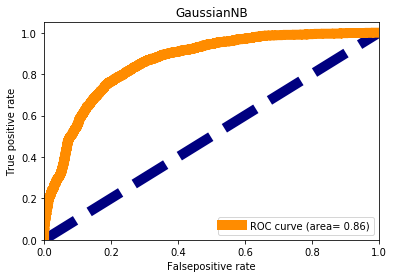

In [78]:
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area= %0.2f)'%roc_auc)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Falsepositive rate')
plt.ylabel('True positive rate')
plt.title('GaussianNB')
plt.legend(loc='lower right')
plt.show()

We get auc score as 86% which means our model is working rightly at 86%. Higher the curve, better the model. Our model is giving a good training and testing accuracy at different threshold values.

# Saving The Model

In [79]:
from sklearn.externals import joblib
joblib.dump(gnb,'gnbfile.obj')

['gnbfile.obj']